## CTR

In [472]:
#coding=utf-8
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.externals import joblib
from sklearn.preprocessing.data import OneHotEncoder
import json
import xgboost as xgb
import multiprocessing as mp
import os
os.environ["OMP_NUM_THREADS"] = "6"  #并行训练
import lightgbm 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from joblib import Parallel, delayed
from math import sqrt

#### 读取train_data

In [473]:
def _load_data(data_file,feature_list):
    data_df = pd.read_csv(filepath_or_buffer = data_file,sep=",", header=None, 
                              names=feature_list)
    return data_df

In [476]:
buy_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1220/buy_all_balance_feature.csv'
not_buy_user_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1225/not_buy_user_balance_feature.csv'
predict_user_df = _load_data(predict_file,predict_feature_list)
user_file ='/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1216/user_feature_less.csv'
user_file_2 = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1225/user_not_buy_feature_less.csv'
 #'/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1214/user_feature.csv'
add_file= '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1225/add_three_feature.csv'


/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [477]:
buy_feature_list = ['index','second_id','s_slug','label']
not_buy_user_feature_list = ['index','second_id', 'birthday', 'phone_model', 'city_level', 'target_weight', 'start_weight', 'latest_weight', 'bmi', 'budget_calory', 'view_goods_count', 'add_cart_count', 'commit_order_count', 'num_paid', 'total_cost', 'record_food_count', 'record_weight_count', 'finished_sports_count', 'habbit_checkin_count', 'post_create_count', 'active_day_count', 'purpose_label', 'activate_channel_label', 'gender_label', 's_slug', 'label']
#ser_feature_list = ['second_id','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40','41','42','43','44', '45','46','47','48','49','50','51']
user_feature_list = ['second_id', 'birthday', 'phone_model', 'city_level', 'target_weight', 'start_weight', 'latest_weight', 'bmi', 'budget_calory', 'view_goods_count', 'add_cart_count', 'commit_order_count', 'num_paid', 'total_cost', 'record_food_count', 'record_weight_count', 'finished_sports_count', 'habbit_checkin_count', 'post_create_count', 'active_day_count', 'purpose_label', 'activate_channel_label', 'gender_label']
goods_feature_list = ['goods_slug', '1', '2','4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', 'EA1', 'EA2', 'EA3', 'EA4', 'EA5', 'EA6', 'EA7', 'EA8', 'EA9', 'EA10', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'x', 'y', 'z', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_1', 'p_7394376616792', 'p_7394376616815', 'p_ea10days_1512g', 'p_ea_3daypttp', 'p_easyace_ysjnew_xmy_190828', 'p_easyfun_madai_tea_20', 'p_ef_funsichi_nwlb', 'p_ef_zkxsd_757g', 's_1upbar_20190308', 's_ES_20190724', 's_bh_BH20F_mini_charge', 's_bu_BH20SW_white', 's_cm25_green_coffee_140ml', 's_cm25_gxmydr_300g', 's_cm25_shucai_50g', 's_cm25_yyb_384g', 's_cm25_yykkxin_420g_new_190103', 's_coffee_190819_1_1', 's_ea_dcnx_240g', 's_ea_xckfy_350g', 's_ea_ximeiyin_210ml', 's_ea_yyrtg_36g', 's_ea_yyyxcw_420g', 's_easyace_kfdby_400g', 's_easyace_ysj_new_28g', 's_easyfun_beefdoupu_150g', 's_easyfun_beefrice_160g', 's_easyfun_blackrice_xjyz_zs_qyz', 's_easyfun_chia_120g_180604', 's_easyfun_chiaoat_300g', 's_easyfun_cold_coffee_30g', 's_easyfun_curryrice_160g', 's_easyfun_dizhijixiongrou_100g', 's_easyfun_dongyingong_350g', 's_easyfun_geshidongka_100g', 's_easyfun_guodong_new_360g', 's_easyfun_heimiquan_240g', 's_easyfun_jrw_new_120g', 's_easyfun_jzbc_130g_180709', 's_easyfun_nanguatang_154g', 's_easyfun_niurougan_250g', 's_easyfun_niurougan_250g_180808', 's_easyfun_qmmb_600g', 's_easyfun_sausage_300g', 's_easyfun_suannaigan_200g', 's_easyfun_surou_180815', 's_easyfun_wc_21wancan', 's_easyfun_ximeigan_240g', 's_easyfun_yingzuidou_180g', 's_easyfun_yumixu_tea_40g', 's_easyfun_zimiquan_240g', 's_easyfun_zishuzhou_350g', 's_easys_52_qingduanshi', 's_ef_beef_spiced_100g', 's_ef_dzbtwl_300g', 's_ef_dzdqjrb_80g', 's_ef_dzhjjrc_300g', 's_ef_dzmys_150g', 's_ef_gdbwbdg_50g', 's_ef_gdbxsy_tj_25g', 's_ef_xgscrp_37g', 's_ef_ysalb_160g', 's_ef_yyfs_beef_41g', 's_ef_zuizuidong_360g', 's_gaodanbai_180g', 's_oday_dbb_both_240g', 's_oday_jxr_xl_190604', 's_oday_qiyazibinggan_256g', 's_qianka_1000k_qingliang_20190703', 's_qianka_1000k_zhongkou_20190703']

In [478]:
#goods_df = _load_data(goods_file,goods_feature_list)
#goods_df =goods_df[~goods_df['goods_slug'].isin(['goods_slug'])]

In [479]:
buy_df = _load_data(buy_file,buy_feature_list)
buy_df = buy_df[['second_id','s_slug','label']]
buy_df = buy_df.sample(frac = 1)
goods_df = _load_data(goods_file,goods_feature_list)
user_df = _load_data(user_file,user_feature_list)
user_df_2 = _load_data(user_file_2,user_feature_list)
user_df = pd.concat([user_df,user_df_2])


/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [480]:
#这三个类别不平衡
#buy_and_not_buy_df = buy_and_not_buy_df[~(buy_and_not_buy_df['s_slug']=='s_ef_dzhjjrc_300g')]
#buy_and_not_buy_df = buy_and_not_buy_df[~(buy_and_not_buy_df['s_slug']=='s_coffee_190819_1_1')]
#buy_and_not_buy_df = buy_and_not_buy_df[~(buy_and_not_buy_df['s_slug']=='s_ef_dzdqjrb_80g')]

In [481]:
user_df = user_df.drop_duplicates('second_id')

In [482]:
buy_df =buy_df[~buy_df['second_id'].isin(['second_id'])]
goods_df =goods_df[~goods_df['goods_slug'].isin(['goods_slug'])]
user_df =user_df[~user_df['second_id'].isin(['second_id'])]

### 合并数据

In [483]:
#user_df =user_df[~user_df['second_id'].isin(['0.0'])]

In [484]:
buy_user_df = pd.merge(buy_df,user_df,on='second_id',how='inner')

In [485]:
not_buy_user_df = _load_data(not_buy_user_file,not_buy_user_feature_list)
del not_buy_user_df['index']
not_buy_user_df = not_buy_user_df.sample(frac = 1)
not_buy_user_df =not_buy_user_df[~not_buy_user_df['second_id'].isin(['second_id'])]

/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [486]:
add_df = _load_data(add_file,not_buy_user_feature_list)
del add_df['index']
add_df = add_df.sample(frac = 1)
add_df =add_df[~add_df['second_id'].isin(['second_id'])]

In [487]:
now_buy_user_df = pd.DataFrame(columns = buy_user_df.columns.tolist())
buy_user_df = buy_user_df.sample(frac = 1)
for i, v in  buy_user_df['s_slug'].value_counts().items():
    tmp_df = buy_user_df[buy_user_df['s_slug']==i].sample(frac = 1).head(15000)
    now_buy_user_df = pd.concat([now_buy_user_df,tmp_df])


In [488]:
#tmp_df = buy_user_df[buy_user_df['s_slug']=='p_easyfun_madai_tea_20'].head(2000)
#buy_user_df = pd.concat([tmp_df,buy_user_df])

In [489]:
#tmp_df = not_buy_user_df[not_buy_user_df['s_slug']=='s_easyfun_yingzuidou_180g'].head(7232)

In [490]:
#not_buy_user_df = pd.concat([tmp_df,not_buy_user_df],sort=True)

In [491]:
#now_buy_user_df = now_buy_user_df.sample(frac=1)

In [492]:
#s = buy_user_df[buy_user_df['label'] ==1]['s_slug'].value_counts().to_frame().T
#s_1 = not_buy_user_df[not_buy_user_df['label'] ==0]['s_slug'].value_counts().to_frame().T

In [493]:
#tmp_list = s.columns.tolist()
#tmp_1_list = s_1.columns.tolist()

In [494]:
#len(tmp_list)

In [181]:
#for i in tmp_1_list:
    #if i in tmp_list:
        #pass
    #else:
        #print(i)

s_coffee_190819_1_1
s_ef_dzdqjrb_80g
s_ef_dzhjjrc_300g


In [ ]:
#######三个sku缺失正例，s_easyfun_yingzuidou_180g负例太少，似乎不少

In [86]:
add_user_goods_df['label']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
100080    1
100081    1
100082    1
100083    1
100084    1
100085    1
100086    1
100087    1
100088    1
100089    1
100090    1
100091    1
100092    1
100093    1
100094    1
100095    1
100096    1
100097    1
100098    1
100099    1
100100    1
100101    1
100102    1
100103    1
100104    1
100105    1
100106    1
100107    1
100108    1
100109    1
Name: label, Length: 100110, dtype: object

In [495]:
add_user_goods_df = pd.merge(add_df,goods_df,left_on='s_slug',right_on='goods_slug',how='inner')
not_buy_user_goods_df = pd.merge(not_buy_user_df,goods_df,left_on='s_slug',right_on='goods_slug',how='inner')
buy_user_goods_df = pd.merge(now_buy_user_df,goods_df,left_on='s_slug',right_on='goods_slug',how='inner')

In [496]:
buy_and_not_buy_user_df = pd.concat([not_buy_user_goods_df,buy_user_goods_df,add_user_goods_df],sort=False)

In [65]:
buy_and_not_buy_user_df.columns.tolist()

['second_id',
 'birthday',
 'phone_model',
 'city_level',
 'target_weight',
 'start_weight',
 'latest_weight',
 'bmi',
 'budget_calory',
 'view_goods_count',
 'add_cart_count',
 'commit_order_count',
 'num_paid',
 'total_cost',
 'record_food_count',
 'record_weight_count',
 'finished_sports_count',
 'habbit_checkin_count',
 'post_create_count',
 'active_day_count',
 'purpose_label',
 'activate_channel_label',
 'gender_label',
 's_slug',
 'label',
 'goods_slug',
 '1',
 '2',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 'EA1',
 'EA2',
 

In [497]:
buy_and_not_buy_user_df['label'] = buy_and_not_buy_user_df['label'].astype(int)

In [498]:
#buy_and_not_buy_user_df = buy_and_not_buy_user_df[~(buy_and_not_buy_user_df['s_slug']=='s_easyfun_yingzuidou_180g')]                      
buy_and_not_buy_user_df = buy_and_not_buy_user_df[~(buy_and_not_buy_user_df['s_slug']=='s_coffee_190819_1_1')]                      
#buy_and_not_buy_user_df = buy_and_not_buy_user_df[~(buy_and_not_buy_user_df['s_slug']=='s_ef_dzdqjrb_80g')]                      
#buy_and_not_buy_user_df = buy_and_not_buy_user_df[~(buy_and_not_buy_user_df['s_slug']=='s_ef_dzhjjrc_300g')]                      

In [499]:
s_easyfun_yingzuidou_180g_df_0 = buy_and_not_buy_user_df[(buy_and_not_buy_user_df['s_slug']=='s_easyfun_yingzuidou_180g') & (buy_and_not_buy_user_df['label'] ==0)]

In [500]:
buy_and_not_buy_user_df = buy_and_not_buy_user_df[~((buy_and_not_buy_user_df['s_slug']=='s_easyfun_yingzuidou_180g') & (buy_and_not_buy_user_df['label'] ==0))]
##正样本少两个

In [501]:
s_easyfun_yingzuidou_180g_df_0 = s_easyfun_yingzuidou_180g_df_0.head(40000)

In [502]:
buy_and_not_buy_user_df = pd.concat([s_easyfun_yingzuidou_180g_df_0,buy_and_not_buy_user_df])

In [503]:
buy_and_not_buy_user_df[(buy_and_not_buy_user_df['s_slug']=='s_ef_dzdqjrb_80g') & (buy_and_not_buy_user_df['label'] ==1)]


,second_id,birthday,phone_model,city_level,target_weight,start_weight,latest_weight,bmi,budget_calory,view_goods_count,...,s_ef_xgscrp_37g,s_ef_ysalb_160g,s_ef_yyfs_beef_41g,s_ef_zuizuidong_360g,s_gaodanbai_180g,s_oday_dbb_both_240g,s_oday_jxr_xl_190604,s_oday_qiyazibinggan_256g,s_qianka_1000k_qingliang_20190703,s_qianka_1000k_zhongkou_20190703
81355,27166886,4,1.0,1,47.0,63.5,62.45,25.0,1450.0,13,...,0,0,0,0,0,0,0,0,0,0
81356,17096931,6,1.0,4,48.0,61.5,55.5,22.23,1338.0,106,...,0,0,0,0,0,0,0,0,0,0
81357,68261567,6,1.0,1,55.0,61.6,62.0,23.62,1374.0,18,...,0,0,0,0,0,0,0,0,0,0
81358,18619826,7,1.0,2,74.0,74.6,74.6,25.2,1772.0,74,...,0,0,0,0,0,0,0,0,0,0
81359,67762883,6,1.0,3,45.0,48.4,47.5,17.45,1389.0,67,...,0,0,0,0,0,0,0,0,0,0
81360,57286566,5,1.0,1,55.299,56.3,69.4,26.15,1475.0,41,...,0,0,0,0,0,0,0,0,0,0
81361,34924790,4,1.0,2,47.5,53.3,53.3,21.35,1108.0,40,...,0,0,0,0,0,0,0,0,0,0
81362,13513594,4,1.0,3,55.0,56.6,59.5,21.6,1740.0,58,...,0,0,0,0,0,0,0,0,0,0
81363,32338392,6,1.0,1,48.5,51.4,51.05,19.94,1329.0,111,...,0,0,0,0,0,0,0,0,0,0
81364,22776559,5,1.0,2,48.0,54.9,53.5,21.16,1339.0,255,...,0,0,0,0,0,0,0,0,0,0


In [504]:
s_ef_dzhjjrc_300g_1_df = buy_and_not_buy_user_df[(buy_and_not_buy_user_df['s_slug']=='s_ef_dzhjjrc_300g') & (buy_and_not_buy_user_df['label'] ==1)].head(5500)        
s_ef_dzdqjrb_80g_1_df = buy_and_not_buy_user_df[(buy_and_not_buy_user_df['s_slug']=='s_ef_dzdqjrb_80g') & (buy_and_not_buy_user_df['label'] ==1)].head(5750)


In [505]:
buy_and_not_buy_user_df = pd.concat([s_ef_dzhjjrc_300g_1_df,buy_and_not_buy_user_df,s_ef_dzdqjrb_80g_1_df])

In [506]:
buy_and_not_buy_user_df[buy_and_not_buy_user_df['label'] ==1]['s_slug'].value_counts()

s_ef_dzdqjrb_80g                     15017
s_ea_yyrtg_36g                       15000
s_easyfun_nanguatang_154g            15000
s_easyfun_suannaigan_200g            15000
s_ef_dzbtwl_300g                     15000
s_ef_gdbxsy_tj_25g                   15000
s_easyfun_beefrice_160g              15000
s_easyfun_chia_120g_180604           15000
s_ef_ysalb_160g                      15000
s_easyfun_ximeigan_240g              15000
s_easyfun_yingzuidou_180g            15000
s_bh_BH20F_mini_charge               15000
p_ea_3daypttp                        15000
s_easyfun_heimiquan_240g             15000
s_qianka_1000k_qingliang_20190703    15000
s_easyfun_dongyingong_350g           15000
s_cm25_yyb_384g                      15000
s_easyfun_jrw_new_120g               15000
s_gaodanbai_180g                     15000
s_easyfun_wc_21wancan                15000
p_7394376616815                      15000
s_easyfun_curryrice_160g             15000
s_qianka_1000k_zhongkou_20190703     15000
s_ES_201907

In [507]:
buy_and_not_buy_user_df.columns.tolist()

['second_id',
 'birthday',
 'phone_model',
 'city_level',
 'target_weight',
 'start_weight',
 'latest_weight',
 'bmi',
 'budget_calory',
 'view_goods_count',
 'add_cart_count',
 'commit_order_count',
 'num_paid',
 'total_cost',
 'record_food_count',
 'record_weight_count',
 'finished_sports_count',
 'habbit_checkin_count',
 'post_create_count',
 'active_day_count',
 'purpose_label',
 'activate_channel_label',
 'gender_label',
 's_slug',
 'label',
 'goods_slug',
 '1',
 '2',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 'EA1',
 'EA2',
 

In [103]:
#tmp_df = buy_and_not_buy_user_df[(buy_and_not_buy_user_df['label'] ==0) & (buy_and_not_buy_user_df['s_slug']=='s_easyfun_yingzuidou_180g')].head(4033)
#buy_and_not_buy_user_df = pd.concat([tmp_df,buy_and_not_buy_user_df])

In [508]:
del buy_and_not_buy_user_df['second_id']
del buy_and_not_buy_user_df['s_slug']
#del buy_and_not_buy_user_goods_df['date']
del buy_and_not_buy_user_df['goods_slug']

In [509]:
feature_list = buy_and_not_buy_user_df.columns.tolist()

In [17]:
#for i in feature_list:
    #buy_and_not_buy_user_goods_df[i]=buy_and_not_buy_user_goods_df[i].astype('float32')

In [18]:
#for i in range(1,77):
    #buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.rename(columns={i:'%s'%i})

In [19]:
#change_feature_list = [' EA代餐', ' EA小助手', ' EF轻主食', ' EF轻小食', ' EF轻烘焙', ' EF轻肉食', ' EF轻配餐', ' EF轻饮', ' EF轻麦片', ' 设备']
#num=1
#for i in change_feature_list:
    #buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.rename(columns={i:'EA%s'%num})
    #num+=1
#del num

### 取出数据和label

In [510]:
#buy_and_not_buy_user_df = buy_and_not_buy_user_df.apply(pd.to_numeric)
def fuc(df):
    df = df.apply(pd.to_numeric)
    return df
buy_and_not_buy_user_df = Parallel(n_jobs=-1)(delayed(func)(row) for index,row in buy_and_not_buy_user_df.iterrows())


KeyboardInterrupt: 

In [518]:
buy_and_not_buy_user_df = buy_and_not_buy_user_df.sample(frac = 1)

KeyboardInterrupt: 

In [519]:
train_df, test_df = train_test_split(buy_and_not_buy_user_df, test_size=0.1, random_state=30)

In [520]:
y_train = train_df['label']  # training label
y_test = test_df['label']   # testing label
X_train = train_df.drop('label', axis=1)  # training dataset
X_test = test_df.drop('label', axis=1)  # testing dataset

In [521]:
train_x_feature_old_list = X_train.columns.tolist()

In [ ]:
1:控制热量
2:'s_ef_dzmys_150g'
3:s_easyfun_yumixu_tea_40g
4:'class_9'

In [538]:
train_x_feature_old_list[126]

'class_9'

In [537]:
train_x_feature_new_list[126]

130

In [523]:
train_x_feature_new_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201]

In [209]:
for i in range(0,198):
    buy_and_not_buy_user_df = buy_and_not_buy_user_df.rename(columns={train_x_feature_old_list[i]:train_x_feature_new_list[i]})

In [210]:
train_df, test_df = train_test_split(buy_and_not_buy_user_df, test_size=0.1, random_state=30)

In [211]:
y_train = train_df['label']  # training label
y_test = test_df['label']   # testing label
X_train = train_df.drop('label', axis=1)  # training dataset
X_test = test_df.drop('label', axis=1)  # testing dataset

# XGBoost+LR

In [140]:
# 定义xgb模型
xgboost = xgb.XGBClassifier(max_leaf_nodes=10,nthread=-1, n_jobs=-1,learning_rate=0.08,
                    n_estimators=40, max_depth=3, gamma=0.2, subsample=0.6, colsample_bytree=0.5,
                           )
# 训练xgb学习
xgboost.fit(X_train, y_train)

# 预测xgb及AUC评测
y_pred_test = xgboost.predict_proba(X_test)[:, 1]
xgb_test_auc = roc_auc_score(y_test, y_pred_test)
print('xgboost test auc: %.5f' % xgb_test_auc)

# xgboost编码原有特征
X_train_leaves = xgboost.apply(X_train)
X_test_leaves = xgboost.apply(X_test)

# 合并编码后的训练数据和测试数据
All_leaves = np.concatenate((X_train_leaves, X_test_leaves), axis=0)
All_leaves = All_leaves.astype(np.int32)

# 对所有特征进行ont-hot编码
xgbenc = OneHotEncoder()
X_trans = xgbenc.fit_transform(All_leaves)
(train_rows, cols) = X_train_leaves.shape

# 定义LR模型
lr_1 = LogisticRegression(n_jobs=-1)
# lr对xgboost特征编码后的样本模型训练
lr_1.fit(X_trans[:train_rows, :], y_train)
# 预测及AUC评测
y_pred_xgblr1 = lr_1.predict_proba(X_trans[train_rows:, :])[:, 1]
xgb_lr_auc1 = roc_auc_score(y_test, y_pred_xgblr1)
print('基于Xgb特征编码后的LR AUC: %.5f' % xgb_lr_auc1)

# 定义LR模型
#lr_2 = LogisticRegression(n_jobs=-1,penalty='l2')
# 组合特征，把编码后的特征与原始特征组合
#X_train_ext = hstack([X_trans[:train_rows, :], X_train])
#X_test_ext = hstack([X_trans[train_rows:, :], X_test])

# lr对组合特征的样本模型训练
#lr_2.fit(X_train_ext, y_train)

# 预测及AUC评测
#y_pred_xgblr2 = lr_2.predict_proba(X_test_ext)[:, 1]
#xgb_lr_auc2 = roc_auc_score(y_test, y_pred_xgblr2)
#print('基于组合特征的LR AUC: %.5f' % xgb_lr_auc2)

xgboost test auc: 0.73438
基于Xgb特征编码后的LR AUC: 0.75987


# model_importance

In [465]:
importances = lr_1.feature_importances_
indices = np.argsort(importances)[::-1]

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [516]:
n[0][2]

0.2726132018324237

In [517]:
train_x_feature_new_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201]
n=lr_1.coef_#模型的重要特征
m = {}
for i in range(len(train_x_feature_new_list)):
    m.setdefault(train_x_feature_new_list[i], 0)
    m[train_x_feature_new_list[i]] = lr_1.coef_[0][i]
    
sorted(m.items(), key=lambda x: x[1], reverse=True)



[(94, 1.6328197634462618),
 (189, 1.012020596881488),
 (181, 0.9343109285102491),
 (130, 0.6729879282811976),
 (169, 0.6122273643155783),
 (29, 0.608288529467673),
 (19, 0.6070364827917889),
 (149, 0.6070364827917889),
 (153, 0.5154108787235865),
 (30, 0.4726068716327172),
 (165, 0.39383636409717554),
 (90, 0.3554448697753698),
 (83, 0.3391278316968245),
 (174, 0.3034143730588997),
 (199, 0.2994304584710366),
 (133, 0.2910243466940404),
 (111, 0.2864341565452474),
 (135, 0.27471411753704816),
 (4, 0.2726132018324237),
 (157, 0.2686165227737057),
 (81, 0.21081547670377457),
 (13, 0.1916106927117839),
 (164, 0.1837466619841295),
 (28, 0.18194317036598376),
 (132, 0.17066624746726505),
 (7, 0.16912842789416982),
 (27, 0.16188847640393378),
 (167, 0.16124294837258682),
 (70, 0.1506999300035064),
 (62, 0.15019562457334662),
 (18, 0.1444270908180159),
 (148, 0.1444270908180159),
 (31, 0.1423212045468571),
 (39, 0.14113971830499128),
 (136, 0.13343695621444912),
 (139, 0.13302107010749098),
 

In [1]:
feature_importance_list = [(94, 1.6328197634462618),
 (189, 1.012020596881488),
 (181, 0.9343109285102491),
 (130, 0.6729879282811976),
 (169, 0.6122273643155783),
 (29, 0.608288529467673),
 (19, 0.6070364827917889),
 (149, 0.6070364827917889),
 (153, 0.5154108787235865),
 (30, 0.4726068716327172),
 (165, 0.39383636409717554),
 (90, 0.3554448697753698),
 (83, 0.3391278316968245),
 (174, 0.3034143730588997),
 (199, 0.2994304584710366),
 (133, 0.2910243466940404),
 (111, 0.2864341565452474),
 (135, 0.27471411753704816),
 (4, 0.2726132018324237),
 (157, 0.2686165227737057),
 (81, 0.21081547670377457),
 (13, 0.1916106927117839),
 (164, 0.1837466619841295),
 (28, 0.18194317036598376),
 (132, 0.17066624746726505),
 (7, 0.16912842789416982),
 (27, 0.16188847640393378),
 (167, 0.16124294837258682),
 (70, 0.1506999300035064),
 (62, 0.15019562457334662),
 (18, 0.1444270908180159),
 (148, 0.1444270908180159),
 (31, 0.1423212045468571),
 (39, 0.14113971830499128),
 (136, 0.13343695621444912),
 (139, 0.13302107010749098),
 (143, 0.13213352347495474),
 (126, 0.13084378078196165),
 (92, 0.13008468585770008),
 (117, 0.12979378935236277),
 (147, 0.1295490517094531),
 (96, 0.12918539322233552),
 (66, 0.12784688715660136),
 (72, 0.12736438695292032),
 (53, 0.12439164395169035),
 (43, 0.12380949725237772),
 (95, 0.12058183152054648),
 (47, 0.11367624084698141),
 (98, 0.11361225293233704),
 (80, 0.11030062780038666),
 (99, 0.1083893288098028),
 (144, 0.10685947346453281),
 (67, 0.10484897126479228),
 (106, 0.10441867341745759),
 (22, 0.1023928696093474),
 (64, 0.09862286814323938),
 (138, 0.09600904356673358),
 (101, 0.09494970021120142),
 (184, 0.09396036375500932),
 (50, 0.09295508225025963),
 (16, 0.09242461441518415),
 (158, 0.08982107316528165),
 (15, 0.08917172253384002),
 (112, 0.08730217976792094),
 (79, 0.0853895696823753),
 (166, 0.08332885609136745),
 (156, 0.08181837727082802),
 (40, 0.07629313746082429),
 (49, 0.07628542460194465),
 (58, 0.07476455868748408),
 (118, 0.07082577811134892),
 (26, 0.06988419880266372),
 (131, 0.06954641836577374),
 (88, 0.06754516374499393),
 (42, 0.06645848323033152),
 (86, 0.06353167137029894),
 (110, 0.062452524097027284),
 (102, 0.062136397367401716),
 (119, 0.0593324343889767),
 (59, 0.05881595415185435),
 (176, 0.05759172022966272),
 (145, 0.056201361284875184),
 (56, 0.055211756085581556),
 (177, 0.05306758921472879),
 (107, 0.05249989344086192),
 (14, 0.049913200340917376),
 (46, 0.04935844176280974),
 (73, 0.04642522050093363),
 (123, 0.045706393537927825),
 (89, 0.0443891775253512),
 (193, 0.04126635295785938),
 (75, 0.04106591048166368),
 (175, 0.037637723757456346),
 (87, 0.03617371305989706),
 (109, 0.03616059293757069),
 (48, 0.0356489166685249),
 (105, 0.03373401034632418),
 (121, 0.033558295028719265),
 (104, 0.0327950653919104),
 (163, 0.030735371354657846),
 (114, 0.022249357484249995),
 (172, 0.021444704626680376),
 (196, 0.02124181927157876),
 (162, 0.017854755175488454),
 (154, 0.0167121927588617),
 (84, 0.012246260030721682),
 (54, 0.012168971921626645),
 (122, 0.00967788025428078),
 (57, 0.009006145378009795),
 (9, 0.0038370929574951178),
 (115, 0.00272928211312831),
 (10, 0.002435064891116268),
 (74, -0.0005752820671743529),
 (160, -0.002605820165423586),
 (185, -0.005679616036456166),
 (201, -0.00638461381373122),
 (17, -0.017229301421197253),
 (6, -0.0188057216273237),
 (36, -0.020544220962412037),
 (140, -0.023695373913414062),
 (192, -0.029359954797260016),
 (78, -0.03324340717596813),
 (76, -0.03379057379465338),
 (8, -0.03879014531107853),
 (200, -0.04516319576442284),
 (187, -0.04541303434199206),
 (127, -0.046706782837244),
 (142, -0.051670620356084246),
 (178, -0.05229856840295697),
 (77, -0.05401943869162735),
 (2, -0.060611477283181385),
 (44, -0.060611477283181385),
 (183, -0.060848065293390534),
 (60, -0.061455527922085064),
 (68, -0.061455527922085064),
 (124, -0.061455527922085064),
 (194, -0.06167417120091215),
 (41, -0.062383411764392195),
 (141, -0.06291262882293099),
 (195, -0.06535816345721578),
 (103, -0.06598165088749107),
 (63, -0.06605862662863712),
 (71, -0.0665629320587706),
 (37, -0.0691470201750437),
 (120, -0.07368361485688013),
 (52, -0.07817844357780382),
 (33, -0.08597181410076911),
 (51, -0.08951976960796428),
 (198, -0.09018819949368503),
 (108, -0.09556877736085734),
 (188, -0.09732770843732991),
 (3, -0.09904211529270043),
 (45, -0.09904211529270043),
 (12, -0.10747369476700669),
 (85, -0.10857055442694223),
 (5, -0.10957851922263871),
 (152, -0.11020870988207002),
 (65, -0.11703849069638486),
 (61, -0.11821096194378226),
 (69, -0.11821096194378226),
 (125, -0.11821096194378226),
 (32, -0.11879829890154425),
 (159, -0.12084147525916676),
 (173, -0.12862012099715267),
 (197, -0.13134332894974435),
 (38, -0.1368754394002768),
 (55, -0.13742984265177588),
 (137, -0.14818683402005392),
 (116, -0.156460211869832),
 (186, -0.15799364987486972),
 (146, -0.16771404289594388),
 (179, -0.1734866775397042),
 (11, -0.18210155475772397),
 (128, -0.1853247797745121),
 (100, -0.19580134534081917),
 (23, -0.20608391456013112),
 (97, -0.20697371293064823),
 (171, -0.21702816390092095),
 (161, -0.24664806036852072),
 (191, -0.2558450311165396),
 (180, -0.2585492668001424),
 (113, -0.28300857163938903),
 (155, -0.293832731344907),
 (20, -0.29506690798924673),
 (150, -0.3398968681797087),
 (129, -0.34292933100481493),
 (34, -0.3435945869900784),
 (91, -0.3520095571327742),
 (182, -0.38103691597111455),
 (151, -0.42089759173885305),
 (190, -0.42497117688224334),
 (21, -0.4657275519298311),
 (168, -0.4738079524520257),
 (82, -0.5058293422737739),
 (170, -0.6247953345609283),
 (35, -0.7380443320732432),
 (134, -0.831934203619634),
 (93, -1.908948798912195)]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

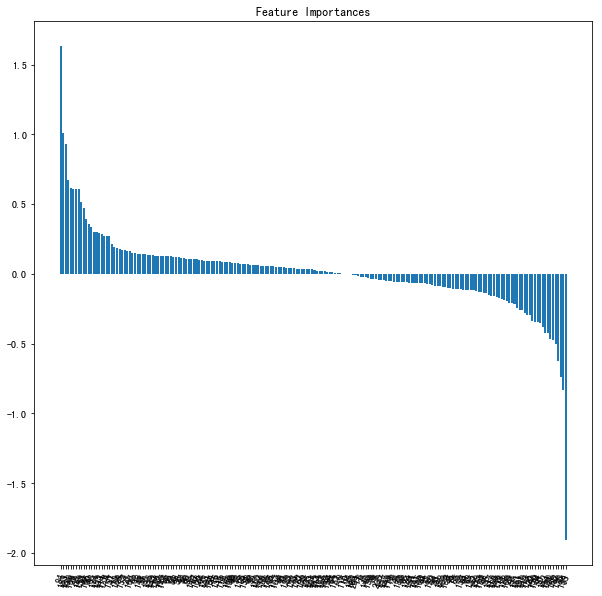

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.bar(range(len(feature_importance_list)), [val[1] for val in feature_importance_list], align='center') 
plt.xticks(range(len(feature_importance_list)), [val[0] for val in feature_importance_list]) 
plt.xticks(rotation=70) 
plt.show() 

In [4]:
x, y = zip(*feature_importance_list)
for label, value in zip(x, y): 
    print(label,value) 

94 1.6328197634462618
189 1.012020596881488
181 0.9343109285102491
130 0.6729879282811976
169 0.6122273643155783
29 0.608288529467673
19 0.6070364827917889
149 0.6070364827917889
153 0.5154108787235865
30 0.4726068716327172
165 0.39383636409717554
90 0.3554448697753698
83 0.3391278316968245
174 0.3034143730588997
199 0.2994304584710366
133 0.2910243466940404
111 0.2864341565452474
135 0.27471411753704816
4 0.2726132018324237
157 0.2686165227737057
81 0.21081547670377457
13 0.1916106927117839
164 0.1837466619841295
28 0.18194317036598376
132 0.17066624746726505
7 0.16912842789416982
27 0.16188847640393378
167 0.16124294837258682
70 0.1506999300035064
62 0.15019562457334662
18 0.1444270908180159
148 0.1444270908180159
31 0.1423212045468571
39 0.14113971830499128
136 0.13343695621444912
139 0.13302107010749098
143 0.13213352347495474
126 0.13084378078196165
92 0.13008468585770008
117 0.12979378935236277
147 0.1295490517094531
96 0.12918539322233552
66 0.12784688715660136
72 0.127364386952

 1) 68                             0.030544
 2) EA4                            0.029896
 3) EA6                            0.025721
 4) num_paid                       0.024253
 5) class_4                        0.022865
 6) EA10                           0.021427
 7) total_cost                     0.021416
 8) 2                              0.021137
 9) 41                             0.020252
10) 73                             0.020165
11) 37                             0.019044
12) EA1                            0.018375
13) 60                             0.017743
14) 10                             0.017242
15) 43                             0.016922
16) add_cart_count                 0.015728
17) s_ES_20190724                  0.015237
18) class_2                        0.013782
19) 27                             0.013604
20) EA3                            0.013387
21) 30                             0.012380
22) 35                             0.012259
23) s_oday_jxr_xl_190604        

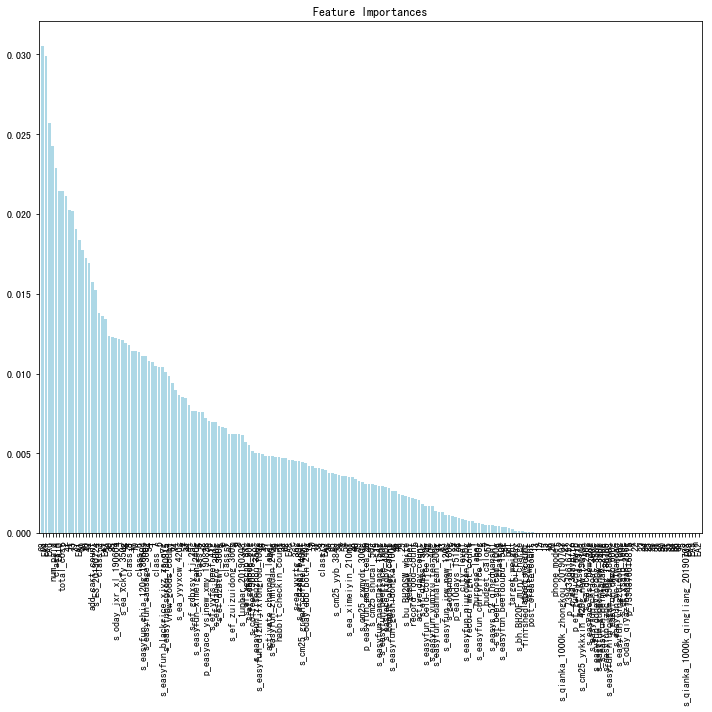

In [117]:
feat_labels_list = X_train.columns.tolist()
feat_labels = np.array(feat_labels_list)
import matplotlib.pyplot as plt
%matplotlib inline
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [ ]:
1、68:代餐
2、轻小食
3、EF轻肉食
4、支付次数
5、
6、设备
7、总支付金额
8、包邮
9、运动前后
10、促进燃脂
11、早餐
12、代餐
13、咖啡因
14、Easy Fun 豆干素食
15、饱腹

In [110]:
col_name = list(X_train.columns)
m = {}
for i in range(len(col_name)):
    m.setdefault(col_name[i], 0)
    m[col_name[i]] = lr.coef_[0][i]
sorted(m.items(), key=lambda x: x[1], reverse=True)

[('70', 5.0690867349064925),
 ('s_cm25_shucai_50g', 1.2910983154353735),
 ('s_easyfun_niurougan_250g', 0.9341657654604647),
 ('27', 0.8745975613392774),
 ('post_create_count', 0.7937107261584062),
 ('s_easyfun_nanguatang_154g', 0.7531684953685507),
 ('33', 0.7043742737402041),
 ('city_level', 0.6192889063530026),
 ('s_cm25_yykkxin_420g_new_190103', 0.6081969801949507),
 ('s_ef_dzbtwl_300g', 0.5893655070065333),
 ('s_easyfun_jrw_new_120g', 0.5592001949085471),
 ('y', 0.5417225895240567),
 ('s_easyfun_wc_21wancan', 0.4929955175955857),
 ('s_easyfun_ximeigan_240g', 0.48339856925754465),
 ('8', 0.4425882035946568),
 ('26', 0.4193165486302701),
 ('p_ef_zkxsd_757g', 0.4034904216108875),
 ('11', 0.39269151281659287),
 ('41', 0.3652144571428826),
 ('39', 0.3484924455717244),
 ('19', 0.34573289886519804),
 ('66', 0.2910977980720874),
 ('s_ef_dzmys_150g', 0.2803302470604073),
 ('p_easyfun_madai_tea_20', 0.27124150137199315),
 ('s_easyfun_niurougan_250g_180808', 0.26777061810181696),
 ('z', 0.265

In [ ]:
#70控制热量
#27即食
#33小袋装
#8Easy Fun 轻饮麦片
#26Easy Ace 其他

In [462]:
#joblib.dump(xgboost, '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1228/xgboost')
#joblib.dump(lr_1, '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1228/lr_1')
#joblib.dump(xgbenc, '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1228/xgbenc')

['/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1228/xgbenc']

In [463]:
lr_1 = joblib.load('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1228/lr_1')
xgboost = joblib.load('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1228/xgboost')
xgbenc = joblib.load('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1228/xgbenc')

In [303]:
# 准确率
y_pred_xgblr1 = np.rint(y_pred_xgblr1)
accuracy = metrics.accuracy_score(y_test, y_pred_xgblr1) 
print("Test Accuracy: %s"%(accuracy))
# 召回率
recall = metrics.recall_score(y_test, y_pred_xgblr1) 
print("Test Recall: %s"%(recall))
# F1值
f1 = metrics.f1_score(y_test, y_pred_xgblr1) 
print("Test F1: %s"%(f1))

Test Accuracy: 0.9065539343386094
Test Recall: 0.9973370512373649
Test F1: 0.9508116825576862


In [ ]:
#效果：不对user做特征工程，正负样本比例3:1，AUC=0.91，准确率=0.84，召回率=0.63，F1=0.65
     #对user做特征工程,0.98072,0.9601831494442987,0.9960948695901405,0.9657172629385203
#user特征工程后merge大大减少？？

# predict

In [377]:
predict_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/predict_user_feature_data/1222/predict_user_featuere_1.csv'
predict_feature_list = ['second_id', 'birthday', 'phone_model', 'city_level', 'target_weight', 'start_weight', 'latest_weight', 'bmi', 'budget_calory', 'view_goods_count', 'add_cart_count', 'commit_order_count', 'num_paid', 'total_cost', 'record_food_count', 'record_weight_count', 'finished_sports_count', 'habbit_checkin_count', 'post_create_count', 'active_day_count', 'purpose_label', 'activate_channel_label', 'gender_label']
predict_user_df = _load_data(predict_file,predict_feature_list)

/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [378]:
predict_user_df

,second_id,birthday,phone_model,city_level,target_weight,start_weight,latest_weight,bmi,budget_calory,view_goods_count,...,total_cost,record_food_count,record_weight_count,finished_sports_count,habbit_checkin_count,post_create_count,active_day_count,purpose_label,activate_channel_label,gender_label
NaN,second_id,birthday,phone_model,city_level,target_weight,start_weight,latest_weight,bmi,budget_calory,view_goods_count,...,total_cost,record_food_count,record_weight_count,finished_sports_count,habbit_checkin_count,post_create_count,active_day_count,purpose_label,activate_channel_label,gender_label
0.0,79927457,4,1.0,2,50.0,62.9,63.1,0.0,1731.0,0,...,0.0,0,0,0,0,0,2,2.0,0,2
1.0,79927492,4,1.0,2,50.0,62.9,63.1,22.24344873705393,1490.3730041501876,0,...,0.0,0,0,0,0,0,1,4.0,0,2
2.0,44100994,9,1.0,4,55.0,74.0,67.8,26.48,1598.0,3,...,0.0,86,8,0,5,0,74,1.0,1,2
3.0,79202404,5,1.0,4,55.0,60.0,60.0,23.4,1490.3730041501876,1,...,0.0,1,0,0,0,0,1,2.0,0,2
4.0,58693077,3,1.0,2,-1.0,68.0,64.0,20.2,1913.0,7,...,0.0,62,5,0,2,1,44,2.0,1,2
5.0,50412126,3,1.0,1,50.0,56.0,53.3,21.4,1295.0,3,...,0.0,24,4,0,1,0,18,1.0,1,2
6.0,43984173,4,1.0,2,50.0,55.0,55.0,20.2,1231.0,11,...,0.0,0,0,0,1,0,6,1.0,0,2
7.0,42918041,6,1.0,1,-1.0,87.6,84.5,29.94,2188.0,2,...,0.0,33,1,0,6,0,39,2.0,1,2
8.0,40318806,4,1.0,2,46.0,46.6,45.3,16.64,1210.0,1,...,0.0,112,1,0,0,0,165,2.0,1,2


In [379]:
predict_user_df = predict_user_df.drop_duplicates('second_id')

In [380]:
predict_user_df =predict_user_df[~predict_user_df['second_id'].isin(['second_id'])]

In [381]:
predict_user_df['second_id'] = predict_user_df['second_id'].astype(int)

In [382]:
predict_user_df = predict_user_df.apply(pd.to_numeric)
for i in goods_df.columns.tolist():
    if i == 'goods_slug':
        continue
    goods_df[i] =goods_df[i].apply(pd.to_numeric)

In [273]:
#goods_feature_list_2 = ['1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', 'EA1', 'EA2', 'EA3', 'EA4', 'EA5', 'EA6', 'EA7', 'EA8', 'EA9', 'EA10', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'x', 'y', 'z', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_1', 'p_7394376616792', 'p_7394376616815', 'p_ea10days_1512g', 'p_ea_3daypttp', 'p_easyace_ysjnew_xmy_190828', 'p_easyfun_madai_tea_20', 'p_ef_funsichi_nwlb', 'p_ef_zkxsd_757g', 's_1upbar_20190308', 's_ES_20190724', 's_bh_BH20F_mini_charge', 's_bu_BH20SW_white', 's_cm25_green_coffee_140ml', 's_cm25_gxmydr_300g', 's_cm25_shucai_50g', 's_cm25_yyb_384g', 's_cm25_yykkxin_420g_new_190103', 's_coffee_190819_1_1', 's_ea_dcnx_240g', 's_ea_xckfy_350g', 's_ea_ximeiyin_210ml', 's_ea_yyrtg_36g', 's_ea_yyyxcw_420g', 's_easyace_kfdby_400g', 's_easyace_ysj_new_28g', 's_easyfun_beefdoupu_150g', 's_easyfun_beefrice_160g', 's_easyfun_blackrice_xjyz_zs_qyz', 's_easyfun_chia_120g_180604', 's_easyfun_chiaoat_300g', 's_easyfun_cold_coffee_30g', 's_easyfun_curryrice_160g', 's_easyfun_dizhijixiongrou_100g', 's_easyfun_dongyingong_350g', 's_easyfun_geshidongka_100g', 's_easyfun_guodong_new_360g', 's_easyfun_heimiquan_240g', 's_easyfun_jrw_new_120g', 's_easyfun_jzbc_130g_180709', 's_easyfun_nanguatang_154g', 's_easyfun_niurougan_250g', 's_easyfun_niurougan_250g_180808', 's_easyfun_qmmb_600g', 's_easyfun_sausage_300g', 's_easyfun_suannaigan_200g', 's_easyfun_surou_180815', 's_easyfun_wc_21wancan', 's_easyfun_ximeigan_240g', 's_easyfun_yingzuidou_180g', 's_easyfun_yumixu_tea_40g', 's_easyfun_zimiquan_240g', 's_easyfun_zishuzhou_350g', 's_easys_52_qingduanshi', 's_ef_beef_spiced_100g', 's_ef_dzbtwl_300g', 's_ef_dzdqjrb_80g', 's_ef_dzhjjrc_300g', 's_ef_dzmys_150g', 's_ef_gdbwbdg_50g', 's_ef_gdbxsy_tj_25g', 's_ef_xgscrp_37g', 's_ef_ysalb_160g', 's_ef_yyfs_beef_41g', 's_ef_zuizuidong_360g', 's_gaodanbai_180g', 's_oday_dbb_both_240g', 's_oday_jxr_xl_190604', 's_oday_qiyazibinggan_256g', 's_qianka_1000k_qingliang_20190703', 's_qianka_1000k_zhongkou_20190703']
#for i in goods_feature_list_2:
    #goods_df[i]=goods_df[i].astype('float32')

In [427]:
#这段不需要运行
num = 0
for i in predict_user_df_1.columns.tolist():
    num+=1
    predict_user_df_1 = predict_user_df_1.rename(columns={i:num})
predict_user_df_1 =predict_user_df_1.apply(pd.to_numeric)
predict_user_df_1[1] = predict_user_df_1[1].astype(int)
print(num)
for i in goods_df.columns.tolist():
    if i == 'goods_slug':
        continue
    goods_df[i] =goods_df[i].apply(pd.to_numeric)
num+=1
for i in goods_df.columns.tolist():
    num+=1
    goods_df = goods_df.rename(columns={i:num})

23


In [349]:
#predict_user_df_1 = predict_user_df.tail(11000)

In [383]:
predict_user_df_1['second_id'] = predict_user_df_1['second_id'].astype(int)

In [384]:
punish_dict = {
    's_oday_jxr_xl_190604':-0.09,
    'p_ea10days_1512g':-0.06,
    's_easyfun_blackrice_xjyz_zs_qyz':-0.13,
    's_ES_20190724':-0.1,
    's_ea_dcnx_240g':-0.07,
    's_cm25_shucai_50g':-0.02,
    's_easyfun_sausage_300g':-0.08,
    's_easyfun_heimiquan_240g':-0.03,
    's_easyfun_zimiquan_240g':-0.04,
    's_easys_52_qingduanshi':-0.06,
    's_easyfun_wc_21wancan':-0.06,
    's_oday_dbb_both_240g':-0.01,
    's_cm25_yyb_384g':-0.04,
    'p_ea_3daypttp':-0.04,
    's_cm25_yykkxin_420g_new_190103':-0.05,
    's_bh_BH20F_mini_charge':0.1,
    's_easyfun_qmmb_600g':0.08,
    's_ef_gdbxsy_tj_25g':0.08,
    's_easyfun_jzbc_130g_180709':0.09,
    's_easyfun_suannaigan_200g':0.06,
    's_ef_qyzdrwh_112g':0.4,
    's_ef_dzbtwl_300g':0.09,
    's_easyfun_mochahongdou_240g':0.11,
    's_cm25_gxmydr_300g':0.08,
    's_ef_dzdqjrb_80g':0.07,
    'p_ef_funsichi_nwlb':0.08,
    's_easyfun_chiaoat_300g':-0.04,
    's_ef_zuizuidong_360g':0.09,
    's_ef_gdbwbdg_50g':0.09,
    'p_ef_zkxsd_757g':0.09,
    's_ef_dzmys_150g':0.09,
    's_easyfun_surou_180815':0.06,
    's_easyfun_dongyingong_350g':0.08,
    's_easyfun_zc_191028':0.16,
    's_ef_llggmp_240g':0.16,
    's_NICE_service_lw':0.12,
    
}

In [449]:
##目标是将需要预测的样本映射成onehot向量，就可以直接放入lr得到结果了。肯定不要用所有训练数据，不然就出来很慢。可以多学习onehotencoder的使用
#会不会原始item数据有问题，商品池？
#为什么AUC会好？
#将时间分箱，每半个小时为一个箱
#统计前七天的转化率，使用贝叶斯平滑
#集中的那几个item都是在数据库中没有买过的,都是靠单品或者套餐映射过去的，这里可能的问题：一个单品存在于两个多规格，然后我把他映射为其中一个多规格了。所以这个多规格就多出来很多点击数据。                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #找徐志拉
def predict(predict_user_df_num):
    user_recommender_dict={}
    for index,row in predict_user_df_num.iterrows():
        user_id = int(row['second_id']) 
        recommendation_list = []
        out_dict={}  
        del row['second_id']
        for index_2,row_2 in goods_df.iterrows():
            s_slug = row_2['goods_slug']  
            del row_2['goods_slug']
            row_3= pd.concat([row,row_2])
            df2 = pd.DataFrame(row_3,dtype=np.float).T      
            print('11')
            try:
                predict_leaves = xgboost.apply(df2)
            except:
                print('33')
            print('12')
            predict_x_one_hot=xgbenc.transform(predict_leaves).toarray()
            print('13')
            predict_test=lr_1.predict_proba(predict_x_one_hot)[:, 1]
            print('14')
            #if s_slug in punish_dict:
                #score = predict_test[0] + punish_dict[s_slug]
            #else:
            score = predict_test[0]
            print('5')
            out_dict.update({s_slug:score}) 
        list1= sorted(out_dict.items(),key=lambda x:x[1],reverse=True)  
        print('6')
        user_recommender_dict.update({user_id:list1[:4]})
    tmp_df = pd.DataFrame(user_recommender_dict).T
    print('2')
    tmp_df.to_csv('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/result/1227/%s.csv'%3)
    return 'ok'

In [458]:
def predict(row):
    user_id = int(row['second_id']) 
    recommendation_list = []
    out_dict={}  
    del row['second_id']
    for index_2,row_2 in goods_df.iterrows():
        s_slug = row_2['goods_slug']  
        del row_2['goods_slug']
        row_3= pd.concat([row,row_2])
        df2 = pd.DataFrame(row_3,dtype=np.float).T      
        predict_leaves = xgboost.apply(df2)
        predict_x_one_hot=xgbenc.transform(predict_leaves).toarray()
        predict_test=lr_1.predict_proba(predict_x_one_hot)[:, 1]
        score = predict_test[0]
        out_dict.update({s_slug:score}) 
    list1= sorted(out_dict.items(),key=lambda x:x[1],reverse=True)  
    user_recommender_dict.update({user_id:list1[:4]})
    return user_recommender_dict

In [460]:
def apply_parallel(data_df, func):
    user_recommender_dict = Parallel(n_jobs=-1)(delayed(func)(row) for index,row in data_df.iterrows())
    tmp_df = pd.DataFrame(user_recommender_dict).T
    tmp_df.to_csv('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/result/1227/%s.csv'%5)
    return 'ok'

if __name__ == '__main__':
    user_recommender_dict={}
    predict_user_df_2 = predict_user_df.head(10)
    df_all =apply_parallel(predict_user_df_2,predict)

In [456]:
##目标是将需要预测的样本映射成onehot向量，就可以直接放入lr得到结果了。肯定不要用所有训练数据，不然就出来很慢。可以多学习onehotencoder的使用
#会不会原始item数据有问题，商品池？
#为什么AUC会好？
#集中的那几个item都是在数据库中没有买过的,都是靠单品或者套餐映射过去的，这里可能的问题：一个单品存在于两个多规格，然后我把他映射为其中一个多规格了。所以这个多规格就多出来很多点击数据。                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #找徐志拉
predict_user_df_num = predict_user_df.head(1000)

user_recommender_dict={}
for index,row in predict_user_df_num.iterrows():
    user_id = int(row['second_id']) 
    recommendation_list = []
    out_dict={}  
    del row['second_id']
    for index_2,row_2 in goods_df.iterrows():
        s_slug = row_2['goods_slug']  
        del row_2['goods_slug']
        row_3= pd.concat([row,row_2])
        df2 = pd.DataFrame(row_3,dtype=np.float).T      
        predict_leaves = xgboost.apply(df2)
        predict_x_one_hot=xgbenc.transform(predict_leaves).toarray()
        predict_test=lr_1.predict_proba(predict_x_one_hot)[:, 1]
        score = predict_test[0]
        out_dict.update({s_slug:score}) 
    list1= sorted(out_dict.items(),key=lambda x:x[1],reverse=True)  
    user_recommender_dict.update({user_id:list1[:4]})
tmp_df = pd.DataFrame(user_recommender_dict).T
tmp_df.to_csv('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/result/1227/%s.csv'%4)
   

In [396]:
len(user_recommender_dict)

2053

In [387]:
df3 = pd.DataFrame.from_dict(user_recommender_dict,orient='index')
tmp_list = []
for row in df3.itertuples():     
    for i in range(1,5):
        tmp_list.append(row[i][0])
tmp_dict = {}
for i in set(tmp_list):
    tmp_dict.update({i:tmp_list.count(i)})
tmp_list_2= sorted(tmp_dict.items(),key=lambda x:x[1],reverse=True) 
tmp_list_2

[('s_oday_jxr_xl_190604', 1551),
 ('s_ES_20190724', 1014),
 ('s_easyfun_blackrice_xjyz_zs_qyz', 993),
 ('s_easyfun_chiaoat_300g', 953),
 ('s_easyfun_heimiquan_240g', 911),
 ('s_easyfun_sausage_300g', 862),
 ('s_easys_52_qingduanshi', 517),
 ('s_easyfun_wc_21wancan', 513),
 ('s_easyfun_zimiquan_240g', 313),
 ('s_easyfun_zishuzhou_350g', 197),
 ('s_ea_yyyxcw_420g', 135),
 ('s_easyfun_curryrice_160g', 57),
 ('s_bh_BH20F_mini_charge', 53),
 ('s_bu_BH20SW_white', 45),
 ('s_oday_dbb_both_240g', 24),
 ('s_easyfun_beefrice_160g', 23),
 ('s_ef_dzdqjrb_80g', 20),
 ('s_cm25_shucai_50g', 19),
 ('s_easyfun_surou_180815', 12)]

In [388]:
user_recommender_dict

{71715026: [('s_oday_jxr_xl_190604', 0.31069822427751104),
  ('s_ES_20190724', 0.27833235039484217),
  ('s_easyfun_blackrice_xjyz_zs_qyz', 0.2548976019352097),
  ('s_easyfun_chiaoat_300g', 0.2548976019352097)],
 71953804: [('s_oday_jxr_xl_190604', 0.4715801053543759),
  ('s_easyfun_blackrice_xjyz_zs_qyz', 0.44238931219005584),
  ('s_easyfun_chiaoat_300g', 0.44238931219005584),
  ('s_easyfun_heimiquan_240g', 0.44238931219005584)],
 72006782: [('s_oday_jxr_xl_190604', 0.29672868230904254),
  ('s_easyfun_blackrice_xjyz_zs_qyz', 0.27277412313257826),
  ('s_easyfun_chiaoat_300g', 0.27277412313257826),
  ('s_easyfun_heimiquan_240g', 0.27277412313257826)],
 72026068: [('s_easyfun_wc_21wancan', 0.7378741796033269),
  ('s_easyfun_sausage_300g', 0.7230856036853539),
  ('s_ES_20190724', 0.7070370450073439),
  ('s_oday_jxr_xl_190604', 0.6632487709994771)],
 72130808: [('s_easyfun_blackrice_xjyz_zs_qyz', 0.41700183243110944),
  ('s_easyfun_chiaoat_300g', 0.41700183243110944),
  ('s_easyfun_heimiqua

In [376]:
tmp_df = pd.DataFrame(user_recommender_dict).T
tmp_df.to_csv('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/result/1227/12_month_buy_user.csv')

# 草稿本

# GBDT+LR

In [124]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 63,
	'num_trees': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
# number of leaves,will be used in feature transformation
num_leaf = 63
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_train)
print('Start predicting...')
# predict and get data on leaves, training data
y_pred = gbm.predict(X_train,pred_leaf=True)

# feature transformation and write result
print('Writing transformed training data')
transformed_training_matrix = np.zeros([len(y_pred),len(y_pred[0]) * num_leaf],dtype=np.int64)
for i in range(0,len(y_pred)):
	temp = np.arange(len(y_pred[0])) * num_leaf - 1 + np.array(y_pred[i])
	transformed_training_matrix[i][temp] += 1

#for i in range(0,len(y_pred)):
#	for j in range(0,len(y_pred[i])):
#		transformed_training_matrix[i][j * num_leaf + y_pred[i][j]-1] = 1

# predict and get data on leaves, testing data
y_pred = gbm.predict(X_test,pred_leaf=True)

# feature transformation and write result
print('Writing transformed testing data')
transformed_testing_matrix = np.zeros([len(y_pred),len(y_pred[0]) * num_leaf],dtype=np.int64)
for i in range(0,len(y_pred)):
	temp = np.arange(len(y_pred[0])) * num_leaf - 1 + np.array(y_pred[i])
	transformed_testing_matrix[i][temp] += 1

#for i in range(0,len(y_pred)):
#	for j in range(0,len(y_pred[i])):
#		transformed_testing_matrix[i][j * num_leaf + y_pred[i][j]-1] = 1

print('Calculate feature importances...')
# feature importances
print('Feature importances:', list(gbm.feature_importance()))
print('Feature importances:', list(gbm.feature_importance("gain")))


# Logestic Regression Start
print("Logestic Regression Start")

# load or create your dataset
print('Load data...')

c = np.array([1,0.5,0.1,0.05,0.01,0.005,0.001])
for t in range(0,len(c)):
	lm = LogisticRegression(penalty='l2',C=c[t]) # logestic model construction
	lm.fit(transformed_training_matrix,y_train)  # fitting the data

	#y_pred_label = lm.predict(transformed_training_matrix )  # For training data
	#y_pred_label = lm.predict(transformed_testing_matrix)    # For testing data
	#y_pred_est = lm.predict_proba(transformed_training_matrix)   # Give the probabilty on each label
	y_pred_est = lm.predict_proba(transformed_testing_matrix)   # Give the probabilty on each label

#print('number of testing data is ' + str(len(y_pred_label)))
#print(y_pred_est)

# calculate predict accuracy
	#num = 0
	#for i in range(0,len(y_pred_label)):
		#if y_test[i] == y_pred_label[i]:
	#	if y_train[i] == y_pred_label[i]:
	#		num += 1
	#print('penalty parameter is '+ str(c[t]))
	#print("prediction accuracy is " + str((num)/len(y_pred_label)))

	# Calculate the Normalized Cross-Entropy
	# for testing data
	NE = (-1) / len(y_pred_est) * sum(((1+y_test)/2 * np.log(y_pred_est[:,1]) +  (1-y_test)/2 * np.log(1 - y_pred_est[:,1])))
	# for training data
	#NE = (-1) / len(y_pred_est) * sum(((1+y_train)/2 * np.log(y_pred_est[:,1]) +  (1-y_train)/2 * np.log(1 - y_pred_est[:,1])))
	print("Normalized Cross Entropy " + str(NE))

Start predicting...
Writing transformed training data
Writing transformed testing data
Calculate feature importances...
Feature importances: [140, 0, 51, 120, 130, 123, 216, 189, 495, 404, 373, 340, 602, 226, 192, 42, 158, 125, 411, 13, 24, 1, 3, 9, 47, 3, 34, 27, 6, 5, 10, 11, 0, 0, 7, 0, 0, 5, 11, 36, 0, 0, 0, 0, 0, 0, 0, 24, 8, 9, 10, 0, 8, 8, 25, 80, 14, 9, 2, 3, 5, 23, 2, 8, 0, 9, 6, 8, 1, 4, 3, 3, 33, 15, 12, 0, 2, 2, 3, 0, 3, 2, 8, 0, 19, 0, 57, 0, 17, 1, 42, 10, 0, 0, 60, 15, 1, 0, 1, 7, 4, 1, 4, 39, 47, 89, 3, 5, 24, 9, 7, 0, 20, 20, 5, 13, 21, 8, 4, 9, 4, 3, 2, 0, 7, 3, 31, 47, 0, 0, 1, 0, 0, 0, 1, 4, 87, 0, 2, 0, 0, 67, 45, 0, 20, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 100, 0, 5, 1, 1, 0, 0, 66, 37, 36, 25, 0, 1, 4, 2, 0, 1, 1, 39, 0, 20, 4, 1, 0, 5, 0, 1, 2, 0, 0, 3, 0, 5, 2, 2, 1, 0, 0, 0]
Feature importances: [7291.76898765564, 0.0, 3511.6850986480713, 7520.302431106567, 8298.48916053772, 8600.149703979492, 12634.560413360596, 10383.120374679565, 30348.624351501465, 29

/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.07687216576439754


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.07416348069520277


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.0699970518560207


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.0688055411798532


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.06639183921141364


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.06535743882206373


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.06312904091917769


# XGBoost

In [180]:
predict_1_df = X_train[X_train['s_easyfun_ximeigan_240g']==1]

In [181]:
predict_1 = xgboost.predict_proba(predict_1_df)[:, 1]

In [177]:
xgboost.predict(predict_1_df)[0]

0

In [184]:
len(list(predict_1))

18869

In [206]:
df1 = buy_and_not_buy_user_goods_df[buy_and_not_buy_user_goods_df['p_easyfun_madai_tea_20']==1]

In [207]:
df1['label'].value_counts()

1    16853
0    15032
Name: label, dtype: int64

In [68]:
user_recommender_dict={}
for index, row in predict_user_df_1.iterrows():
    #%time user_tmp_df = row.to_frame().T
    #user_id = predict_user_df.loc[indexs].values.tolist()[0]
    #%time user_id = int(user_tmp_df.iloc[0,0])
    user_id = int(row['second_id'])
    recommendation_list = []
    out_dict={}
    for goods_index, row_2 in goods_df.iterrows():
        %time goods_tmp_df = row_2.to_frame().T
        print('a')
        %time s_slug = goods_tmp_df.iloc[0,0]
        print('b')
        %time s_slug = row_2['goods_slug']
        print('c')
        %time s2= pd.concat([row,row_2])
        print('d')
        %time df2 = s2.to_frame().T
        print('e')
        #s_slug = goods_df.loc[goods_indexs].values.tolist()[0]\
        #%time df2 = pd.concat([user_tmp_df.reset_index(drop=True),goods_tmp_df.reset_index(drop=True)],axis=1)
        #action_df = pd.DataFrame(columns=['second_id','s_slug'],data=[(user_id,s_slug),])  
        #df1 = pd.merge(action_df,user_tmp_df,on='second_id',how='inner')
        #df2 = pd.merge(df1,goods_tmp_df,left_on='s_slug',right_on='goods_slug',how='inner') 
        %time del df2['second_id']
        print('f')
        del df2['goods_slug']
        print(df2)
        break
        #for i in feature_list:
            #df2[i]=df2[i].astype('float32')
        #for i in range(1,77):
            #df2 = df2.rename(columns={i:'%s'%i})
        #change_feature_list = [' EA代餐', ' EA小助手', ' EF轻主食', ' EF轻小食', ' EF轻烘焙', ' EF轻肉食', ' EF轻配餐', ' EF轻饮', ' EF轻麦片', ' 设备']
        #num=1
        #for i in change_feature_list:
            #df2 = df2.rename(columns={i:'EA%s'%num})
            #num+=1
        #del num
        #%time df2 = df2.apply(pd.to_numeric)
        print('g')
        %time predict_leaves = xgboost.apply(df2)
        print('h')
        #print('1')
        #predict_leaves = np.concatenate((uu,predict_leaves), axis=0)
        #(all_rows, cols) = uu.shape
        #X_predict = xgbenc.fit_transform(predict_leaves.reshape(1, -1))
        %time predict_a=xgbenc.transform(predict_leaves).toarray()
        print('i')
        #X_predict_ext = hstack([predict_a, df2])
        #predict_test = lr_1.predict_proba(X_predict_ext)[:, 1]
        %time predict_test=lr_1.predict_proba(predict_a)[:, 1]
        print('j')
        if  s_slug=='s_cm25_shucai_50g' or s_slug=='s_qianka_1000k_qingliang_20190703' or s_slug=='s_qianka_1000k_zhongkou_20190703':
            score = predict_test[0] - 0.00007
        elif s_slug == 's_easyfun_zimiquan_240g' or s_slug== 'p_ea_3daypttp' or s_slug== 's_easyfun_blackrice_xjyz_zs_qyz' or s_slug== 's_bu_BH20SW_white' or s_slug== 's_easyfun_heimiquan_240g':
            score = predict_test[0] - 0.00000008
        elif s_slug == 's_easyfun_wc_21wancan':
            score = predict_test[0] - 0.00003
        elif s_slug=='s_easyfun_curryrice_160g' or s_slug=='s_cm25_yykkxin_420g_new_190103' or s_slug=='p_easyfun_madai_tea_20':
            score = predict_test[0] - 0.0004
        elif s_slug=='p_ef_funsichi_nwlb':
            score = predict_test[0] + 0.005
        elif s_slug=='s_ES_20190724'  or s_slug=='s_easyfun_dongyingong_350g'  or s_slug=='s_ef_dzbtwl_300g':
            score = predict_test[0] + 0.00000006
        elif s_slug=='s_easyfun_niurougan_250g_180808' or s_slug=='s_oday_dbb_both_240g' or s_slug=='s_easys_52_qingduanshi':
            score = predict_test[0] + 0.000000004
        elif s_slug=='s_easyfun_suannaigan_200g' :
            score = predict_test[0] + 0.00000003
        elif s_slug=='s_ef_beef_spiced_100g':
            score = predict_test[0] + 0.00000001
        elif s_slug=='s_easyfun_beefdoupu_150g'  or s_slug=='s_easyfun_jzbc_130g_180709':
            score = predict_test[0] + 0.00000007
        elif s_slug == 's_easyfun_surou_180815':
            score = predict_test[0] + 0.00000005  
            print(score)
        else:
            score = predict_test[0]
        %time out_dict.update({s_slug:score}) 
        print('k')
        
        #list1 =[]
        #if predict_test[0]==1:
            #list1.append(s_slug)
    %time list1= sorted(out_dict.items(),key=lambda x:x[1],reverse=True) 
    print('p')
    %time user_recommender_dict.update({user_id:list1[:4]})
    print('w')
    break

CPU times: user 548 µs, sys: 9 µs, total: 557 µs
Wall time: 563 µs
a
CPU times: user 179 µs, sys: 15 µs, total: 194 µs
Wall time: 190 µs
b
CPU times: user 28 µs, sys: 1e+03 ns, total: 29 µs
Wall time: 34.1 µs
c
CPU times: user 540 µs, sys: 29 µs, total: 569 µs
Wall time: 554 µs
d
CPU times: user 351 µs, sys: 21 µs, total: 372 µs
Wall time: 357 µs
e
CPU times: user 380 µs, sys: 45 µs, total: 425 µs
Wall time: 397 µs
f
  birthday phone_model city_level target_weight start_weight latest_weight  \
0        5           1          3            50         53.3          50.9   

     bmi budget_calory view_goods_count add_cart_count  \
0  20.39          1207                3              0   

                ...                s_ef_xgscrp_37g s_ef_ysalb_160g  \
0               ...                              0               0   

  s_ef_yyfs_beef_41g s_ef_zuizuidong_360g s_gaodanbai_180g  \
0                  0                    0                0   

  s_oday_dbb_both_240g s_oday_jxr_xl_19

In [ ]:
predict_user_df_1['second_id'] = predict_user_df_1['second_id'].astype(int)
user_recommender_dict={}
for user_index, user_row in predict_user_df_1.iterrows():
    user_id = row['second_id']
    recommendation_list = []
    out_dict={}
    for goods_index, goods_row in goods_df.iterrows():
        s_slug = goods_row['goods_slug']
        predict_s= pd.concat([user_row,goods_row])
        predict_df = predict_s.to_frame().T
        del predict_df['second_id']
        del predict_df['goods_slug']
        predict_df = predict_df.apply(pd.to_numeric)
        predict_leaves = xgboost.apply(predict_df)
        predict_x_one_hot=xgbenc.transform(predict_leaves).toarray()
        predict_test=lr_1.predict_proba(predict_x_one_hot)[:, 1]
        if  s_slug=='s_cm25_shucai_50g' or s_slug=='s_qianka_1000k_qingliang_20190703' or s_slug=='s_qianka_1000k_zhongkou_20190703':
            score = predict_test[0] - 0.00007
        elif s_slug == 's_easyfun_zimiquan_240g' or s_slug== 'p_ea_3daypttp' or s_slug== 's_easyfun_blackrice_xjyz_zs_qyz' or s_slug== 's_bu_BH20SW_white' or s_slug== 's_easyfun_heimiquan_240g':
            score = predict_test[0] - 0.00000008
        elif s_slug == 's_easyfun_wc_21wancan':
            score = predict_test[0] - 0.00003
        elif s_slug=='s_easyfun_curryrice_160g' or s_slug == 's_easyfun_surou_180815' or s_slug=='s_easyfun_beefdoupu_150g'  or s_slug=='s_easyfun_jzbc_130g_180709' or s_slug=='s_cm25_yykkxin_420g_new_190103' or s_slug=='p_easyfun_madai_tea_20':
            score = predict_test[0] - 0.0004
        elif s_slug=='p_ef_funsichi_nwlb':
            score = predict_test[0] + 0.005
        elif s_slug=='s_ES_20190724'  or s_slug=='s_easyfun_dongyingong_350g'  or s_slug=='s_ef_dzbtwl_300g':
            score = predict_test[0] + 0.00000006
        elif s_slug=='s_easyfun_niurougan_250g_180808' or s_slug=='s_oday_dbb_both_240g' or s_slug=='s_easys_52_qingduanshi':
            score = predict_test[0] + 0.000000004
        elif s_slug=='s_easyfun_suannaigan_200g' :
            score = predict_test[0] + 0.00000003 
        else:
            score = predict_test[0]
        out_dict.update({s_slug:score}) 
    list1= sorted(out_dict.items(),key=lambda x:x[1],reverse=True)  
    user_recommender_dict.update({user_id:list1[:4]})

# lightgbm+lr

In [76]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # GBDT算法为基础
    'objective': 'binary',  # 因为要完成预测用户是否买单行为，所以是binary，不买是0，购买是1
    'metric': 'auc',  # 评判指标
    'max_bin': 255,  # 大会有更准的效果,更慢的速度
    'learning_rate': 0.1,  # 学习率
    'num_leaves': 20,  # 大会更准,但可能过拟合
    'max_depth': 4,  # 小数据集下限制最大深度可防止过拟合,小于0表示无限制
    'feature_fraction': 0.8,  # 防止过拟合
    'bagging_freq': 5,  # 防止过拟合
    'bagging_fraction': 0.8,  # 防止过拟合
    'min_data_in_leaf': 20,  # 防止过拟合
    'min_sum_hessian_in_leaf': 3.0,  # 防止过拟合
    'nthread':-1,
    'n_job':-1,
}
gbm = lightgbm.LGBMRegressor(objective='regression',learning_rate=0.1,n_estimators=30,num_threads=-1,
                             num_leaves=20,max_bin=255,histogram_pool_size=-1, n_job = -1,                      
                            )
gbm.fit(X_train, y_train)

#lgb_train = lgb.Dataset(X_train,y_train)
#lgb_eval = lgb.Dataset(X_test,y_test,reference = lgb_train)
#lgb = lightgbm.LGBMModel(boosting_type='gbdt', num_leaves=20, max_depth=4,
#learning_rate=0.1, n_estimators=10, max_bin=255, subsample_for_bin=200000,
#objective=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20,
#subsample=1.0, subsample_freq=1, colsample_bytree=1.0, reg_alpha=0.0,
#reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True,class_weight=None,bagging_freq = 5,
#bagging_fraction = 0.8,feature_fraction = 0.8,min_data_in_leaf = 20,min_sum_hessian_in_leaf = 3.0,
#nthread = -1, n_job = -1) 
#X_train = np.array(X_train)
#y_train =  np.array(y_train,dtype=int)
#lgb.fit(X_train, y_train)
X_train_leaves =lgb.apply(X_train,num_iteration=0)
X_train_leaves =lgb.apply(X_test,num_iteration=0)

# 定义xgb模型
#xgboost = xgb.XGBClassifier(max_leaf_nodes=20,nthread=-1, n_jobs=-1,learning_rate=0.1,
                    #n_estimators=30, max_depth=4, gamma=0, subsample=0.9, colsample_bytree=0.5)
# 训练xgb学习
#xgboost.fit(X_train, y_train)

# 预测xgb及AUC评测
#y_pred_test = xgboost.predict_proba(X_test)[:, 1]
#xgb_test_auc = roc_auc_score(y_test, y_pred_test)
#print('xgboost test auc: %.5f' % xgb_test_auc)

# xgboost编码原有特征
#X_train_leaves = xgboost.apply(X_train)
#X_test_leaves = xgboost.apply(X_test)

# 合并编码后的训练数据和测试数据
#All_leaves = np.concatenate((X_train_leaves, X_test_leaves), axis=0)
#All_leaves = All_leaves.astype(np.int32)

# 对所有特征进行ont-hot编码
#xgbenc = OneHotEncoder()
#X_trans = xgbenc.fit_transform(All_leaves)
#(train_rows, cols) = X_train_leaves.shape

# 定义LR模型
#lr_1 = LogisticRegression(n_jobs=-1)
# lr对xgboost特征编码后的样本模型训练
#lr_1.fit(X_trans[:train_rows, :], y_train)
# 预测及AUC评测
#y_pred_xgblr1 = lr_1.predict_proba(X_trans[train_rows:, :])[:, 1]
#xgb_lr_auc1 = roc_auc_score(y_test, y_pred_xgblr1)
#print('基于Xgb特征编码后的LR AUC: %.5f' % xgb_lr_auc1)

# 定义LR模型
#lr_2 = LogisticRegression(n_jobs=-1,penalty='l2')
# 组合特征，把编码后的特征与原始特征组合
#X_train_ext = hstack([X_trans[:train_rows, :], X_train])
#X_test_ext = hstack([X_trans[train_rows:, :], X_test])

# lr对组合特征的样本模型训练
#lr_2.fit(X_train_ext, y_train)

# 预测及AUC评测
#y_pred_xgblr2 = lr_2.predict_proba(X_test_ext)[:, 1]
#xgb_lr_auc2 = roc_auc_score(y_test, y_pred_xgblr2)
#print('基于组合特征的LR AUC: %.5f' % xgb_lr_auc2)

ValueError: Unknown LGBMModel type.

# LR

In [26]:


# 定义xgb模型
#xgboost = xgb.XGBClassifier(max_leaf_nodes=20,nthread=-1, n_jobs=-1,learning_rate=0.1,
                    #n_estimators=30, max_depth=4, gamma=0, subsample=0.9, colsample_bytree=0.5)
# 训练xgb学习
#xgboost.fit(X_train, y_train)

# 预测xgb及AUC评测
#y_pred_test = xgboost.predict_proba(X_test)[:, 1]
#xgb_test_auc = roc_auc_score(y_test, y_pred_test)
#print('xgboost test auc: %.5f' % xgb_test_auc)

# xgboost编码原有特征
#X_train_leaves = xgboost.apply(X_train)
#X_test_leaves = xgboost.apply(X_test)

# 合并编码后的训练数据和测试数据
#All_leaves = np.concatenate((X_train_leaves, X_test_leaves), axis=0)
#All_leaves = All_leaves.astype(np.int32)

# 对所有特征进行ont-hot编码
#xgbenc = OneHotEncoder()
#X_trans = xgbenc.fit_transform(All_leaves)
#(train_rows, cols) = X_train_leaves.shape

# 定义LR模型
lr_1 = LogisticRegression(n_jobs=-1)
# lr对xgboost特征编码后的样本模型训练
lr_1.fit(X_train, y_train)
# 预测及AUC评测
y_pred_xgblr1 = lr_1.predict_proba(X_test)[:, 1]
xgb_lr_auc1 = roc_auc_score(y_test, y_pred_xgblr1)
print('基于Xgb特征编码后的LR AUC: %.5f' % xgb_lr_auc1)

# 定义LR模型
#lr_2 = LogisticRegression(n_jobs=-1,penalty='l2')
# 组合特征，把编码后的特征与原始特征组合
#X_train_ext = hstack([X_trans[:train_rows, :], X_train])
#X_test_ext = hstack([X_trans[train_rows:, :], X_test])

# lr对组合特征的样本模型训练
#lr_2.fit(X_train_ext, y_train)

# 预测及AUC评测
#y_pred_xgblr2 = lr_2.predict_proba(X_test_ext)[:, 1]
#xgb_lr_auc2 = roc_auc_score(y_test, y_pred_xgblr2)
#print('基于组合特征的LR AUC: %.5f' % xgb_lr_auc2)

基于Xgb特征编码后的LR AUC: 0.65226


In [172]:
punish_dict = {
    's_cm25_shucai_50g':-0.00008,
    's_easyfun_blackrice_xjyz_zs_qyz':-0.00009,
    's_easyfun_zimiquan_240g':-0.00000008,
    's_easyfun_chiaoat_300g':-0.0000002,
    's_bu_BH20SW_white':-0.00000008,
    's_easyfun_wc_21wancan':-0.00009,
    's_qianka_1000k_zhongkou_20190703':-0.00009,
    's_qianka_1000k_qingliang_20190703':-0.00009,
    'p_ea_3daypttp':-0.0004,
    'p_ea10days_1512g':-0.0001,
    's_oday_dbb_both_240g':-0.0005,
    's_cm25_yykkxin_420g_new_190103':-0.0001,
    's_cm25_yyb_384g':-0.00005,
    's_easyfun_curryrice_160g':-0.00000004,
    'p_easyfun_madai_tea_20':-0.00000004,
    's_ea_dcnx_240g':-0.00001,
    'p_ef_funsichi_nwlb':0.0000005,
    's_ES_20190724':0.00000006,
    's_easyfun_dongyingong_350g':0.00000006,
    's_ef_dzbtwl_300g':0.00000006,
    's_easyfun_niurougan_250g_180808':0.000000004,
    's_easys_52_qingduanshi':0.000000004,
    's_easyfun_suannaigan_200g':0.00000003,
    's_ef_beef_spiced_100g':0.00000001,
    's_easyfun_beefdoupu_150g':0.00000007,
    's_easyfun_jzbc_130g_180709':0.00000007,
    's_easyfun_surou_180815':0.00000005,
}